In [92]:
'''
This cell performs the following:
Loads the tweet data from a CSV file into a pandas DataFrame.
Defines a clean_text function to:
    Convert text to lowercase.
    Remove URLs, mentions, and hashtags.
    Remove extra spaces and punctuations.
'''

import pandas as pd
import numpy as np
import re

df = pd.read_csv('twitter_data.csv')

# Function to clean the tweet text
def clean_text(text):
    text = text.lower()  # convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+', '', text)  # remove mentions
    text = re.sub(r'\#\w+', '', text)  # remove hashtags
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with a single space
    text = re.sub(r"^\s+|\s+$", "", text)  # remove spaces at the beginning and at the end of string
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuations
    return text



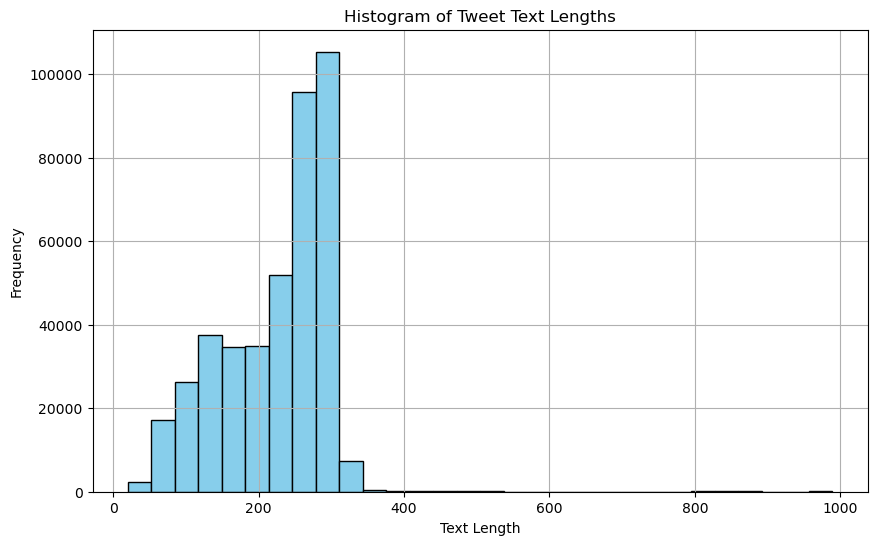

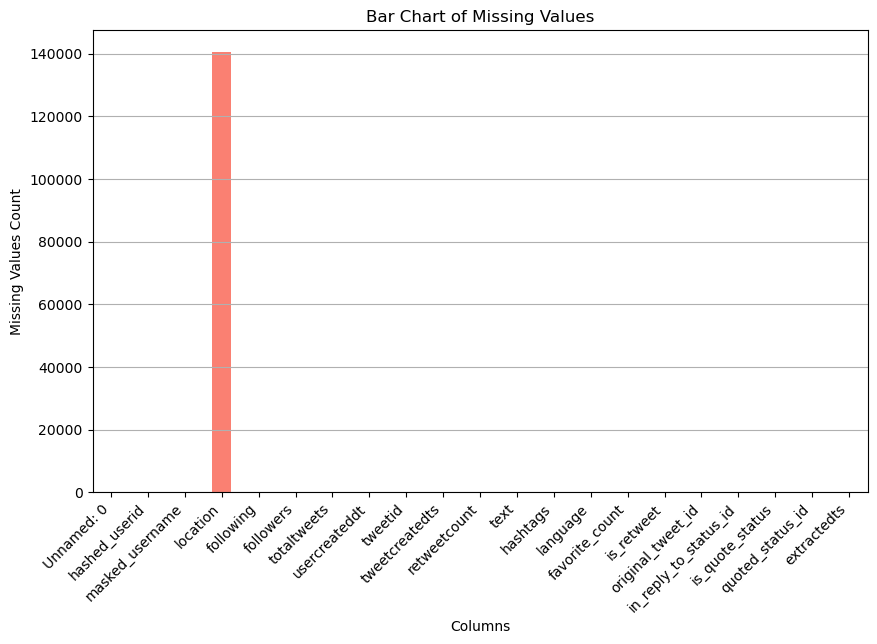

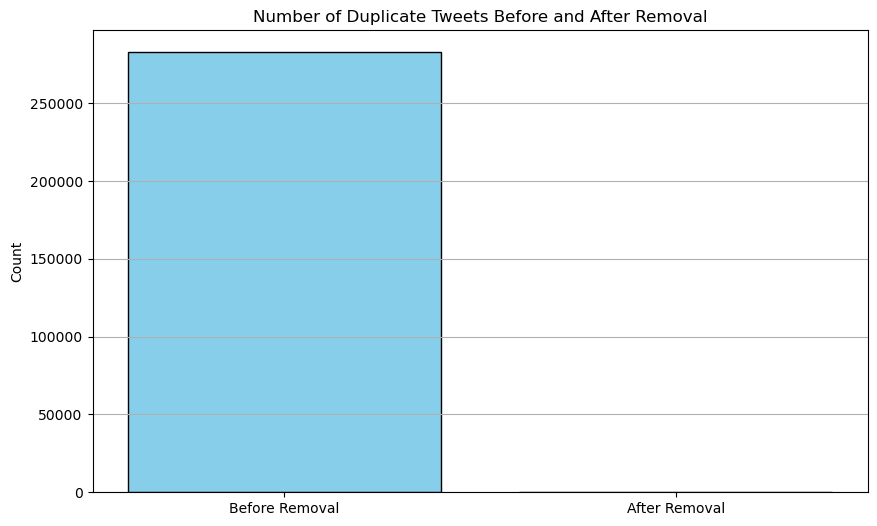

In [93]:

import matplotlib.pyplot as plt

# Histogram of Text Lengths
def plot_text_length_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['text'].str.len(), bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram of Tweet Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Bar Chart of Missing Values
def plot_missing_values_bar_chart(df):
    missing_values_count = df.isnull().sum()
    plt.figure(figsize=(10, 6))
    missing_values_count.plot(kind='bar', color='salmon')
    plt.title('Bar Chart of Missing Values')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()


plot_text_length_histogram(df)
plot_missing_values_bar_chart(df)


import matplotlib.pyplot as plt

# Visualize number of duplicate tweets before and after removal
def visualize_duplicate_tweets_before_after(df):
    # Count total number of duplicate tweets before removal
    total_duplicates_before = df.duplicated(subset=['text']).sum()

    # Remove duplicate tweets and count total number of duplicate tweets after removal
    df_cleaned = df.drop_duplicates(subset=['text'])
    total_duplicates_after = df_cleaned.duplicated(subset=['text']).sum()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(['Before Removal', 'After Removal'], [total_duplicates_before, total_duplicates_after], color=['skyblue', 'salmon'], edgecolor='black')
    plt.title('Number of Duplicate Tweets Before and After Removal')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

visualize_duplicate_tweets_before_after(df)

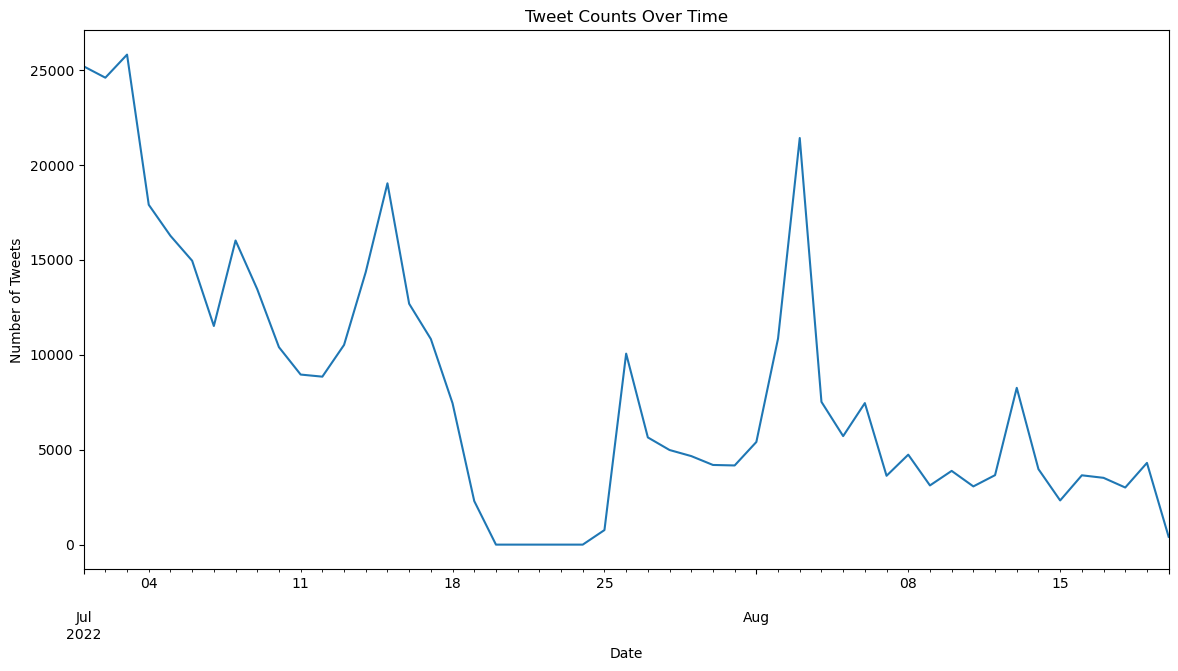

In [94]:
# This section cleans 'tweetcreatedts' and graphs the data
def is_valid_time(value):
    try:
        pd.to_datetime(value, format='%H:%M:%S.%f', errors='raise')
        return True
    except:
        return False

# Filter out rows with invalid time data in 'tweetcreatedts'
valid_times = df['tweetcreatedts'].apply(is_valid_time)
df_clean = df[valid_times]

# Convert 'tweetcreatedts' to datetime in the cleaned DataFrame
df_clean['tweetcreatedts'] = pd.to_datetime(df_clean['tweetcreatedts'])

# Convert tweetcreatedts to datetime and set it as the index
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])
df.set_index('tweetcreatedts', inplace=True)

# Time series plot of tweets over time
plt.figure(figsize=(14, 7))
df['tweetid'].resample('D').count().plot()  # Resampling by day and counting tweets
plt.title('Tweet Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


In [95]:
# Clean the tweets
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove Duplicate tweets 
df.drop_duplicates(subset=['cleaned_text'], inplace=True)

# Drop rows with empty tweet text
df.dropna(subset=['cleaned_text'], inplace=True) # Drops rows with empty text in tweet coulmn


# Display the first few rows of the cleaned data
#print(df.head())

In [96]:
'''
This cell will:
Tokenize the tweets: Break down the text into individual words (tokens).
Remove stopwords: Filter out common words like 'the', 'is', etc., that don't contribute much to sentiment.
Apply stemming: Reduce words to their root form.
'''

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization, Stopword Removal, and Stemming
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Optional: Stemming (you can also use Lemmatization based on your preference)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the tokens back into a string
    return ' '.join(stemmed_tokens)

# Apply the preprocessing to the cleaned text
df['preprocessed_text'] = df['cleaned_text'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alancheung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alancheung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                     Unnamed: 0         hashed_userid masked_username  \
tweetcreatedts                                                          
2022-07-01 06:53:25           0  13028308852725196659       *****roy1   
2022-07-01 06:53:38           3  21587659761682762378    ******oshi23   
2022-07-01 06:54:08           5  18429164806256550337     ******nisio   
2022-07-01 06:54:17           6  74399025399219128966    ******hnikku   
2022-07-01 06:54:21           7  17291665056511819473     ******eC_NY   

                             location  following  followers  totaltweets  \
tweetcreatedts                                                             
2022-07-01 06:53:25               NaN       9590       8725        29317   
2022-07-01 06:53:38            Mumbai        232        132         4970   
2022-07-01 06:54:08  Teresina, Brasil       4998       4074       569986   
2022-07-01 06:54:17              gaya         65        128         7907   
2022-07-01 06:54:21             

In [97]:
'''
This cell processes emojis and slang.
'''
import emoji

def convert_emojis_to_text(text):
    return emoji.demojize(text, delimiters=("", " "))

slang_dict = {
    'lol': 'laughing out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    # Add more slang terms and their translations here
}

def translate_slang(text):
    words = text.split()
    translated_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(translated_words)


# Apply emoji conversion
df['text_with_emojis'] = df['preprocessed_text'].apply(convert_emojis_to_text)

# Apply slang translation
df['text_with_slang'] = df['text_with_emojis'].apply(translate_slang)



In [98]:
'''
This cell will:
Modify the preprocessed text to handle negations.
Use the CountVectorizer from Scikit-Learn to convert the text data into a Bag of Words model,
which represents text data in numerical form.
'''

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Function to handle negations
def handle_negations(text):
    negation_words = ['not', 'never', 'no']
    words = text.split()
    words_with_negation = []
    i = 0
    while i < len(words):
        if words[i] in negation_words and i+1 < len(words):
            words_with_negation.append(words[i] + '_' + words[i+1])
            i += 2  # Skip the next word
        else:
            words_with_negation.append(words[i])
            i += 1
    return ' '.join(words_with_negation)

# Apply negation handling
df['text_with_negations'] = df['text_with_slang'].apply(handle_negations)


# SENTIMENT PROCESSING SECTION 

# Custom lists of positive and negative words
positive_words = ['good', 'great', 'excellent', 'awesome', 'fantastic', 'amazing', 'superb', 'wonderful', 'outstanding', 'terrific', 'pleasure', 'joy', 'love', 'happy', 'delight', 'satisfied', 'excited', 'admire', 'brilliant', 'kind', 'grateful', 'uplifting']
negative_words = ['bad', 'terrible', 'horrible', 'awful', 'disappointing', 'unpleasant', 'poor', 'inferior', 'disgusting', 'ugly', 'disgraceful', 'dreadful', 'sad', 'depressed', 'angry', 'hate', 'annoying', 'frustrating', 'unacceptable', 'regret', 'boring', 'annoyed', 'unhappy', 'displeased', 'upset']


# Function to assign sentiment scores
def assign_sentiment(text):
    sentiment_score = 0
    words = text.split()
    for word in words:
        if word in positive_words:
            sentiment_score += 1
        elif word in negative_words:
            sentiment_score -= 1
    return sentiment_score

# Apply sentiment analysis
df['sentiment_score'] = df['text_with_negations'].apply(assign_sentiment)

#End 

# Vectorization - Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the number of features
X = vectorizer.fit_transform(df['text_with_negations'])

# Now, X is a matrix representing the Bag of Words model of the text data


In [99]:
print(X)

  (0, 992)	1
  (0, 497)	1
  (0, 277)	1
  (0, 97)	1
  (0, 421)	1
  (0, 313)	1
  (0, 523)	1
  (0, 629)	1
  (0, 152)	1
  (0, 769)	1
  (0, 407)	2
  (0, 684)	1
  (0, 972)	1
  (0, 750)	1
  (0, 153)	1
  (0, 925)	1
  (0, 720)	1
  (0, 676)	1
  (0, 235)	1
  (1, 414)	1
  (1, 96)	1
  (1, 155)	1
  (1, 291)	1
  (1, 286)	1
  (1, 390)	1
  :	:
  (122577, 983)	1
  (122577, 874)	1
  (122577, 252)	1
  (122577, 138)	1
  (122577, 114)	1
  (122577, 424)	1
  (122577, 37)	1
  (122577, 469)	1
  (122577, 46)	1
  (122578, 969)	1
  (122578, 568)	1
  (122578, 385)	1
  (122578, 597)	1
  (122579, 949)	1
  (122579, 142)	1
  (122579, 396)	1
  (122579, 430)	2
  (122579, 570)	1
  (122579, 856)	2
  (122579, 292)	1
  (122579, 588)	1
  (122579, 691)	1
  (122580, 990)	1
  (122580, 58)	1
  (122580, 391)	1


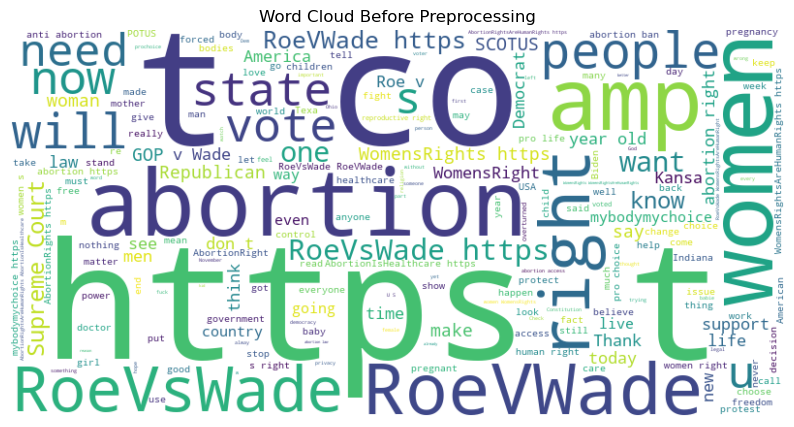

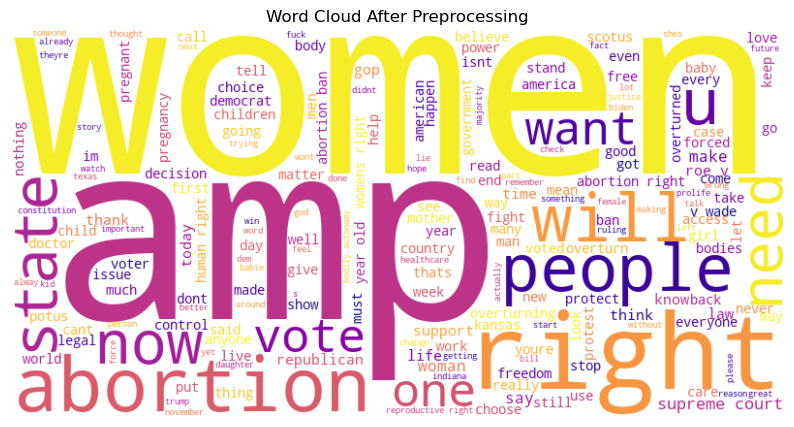

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_word_cloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


# Before preprocessing (using original tweet text)
tweet_text_before_preprocessing = ' '.join(df['text'].dropna())
generate_word_cloud(tweet_text_before_preprocessing, 'Word Cloud Before Preprocessing', 'viridis')

# After preprocessing (using cleaned tweet text)
tweet_text_after_preprocessing = ' '.join(df['cleaned_text'].dropna())
generate_word_cloud(tweet_text_after_preprocessing, 'Word Cloud After Preprocessing', 'plasma')


In [101]:
df2 = df.copy()
df2 = df.drop(columns=['cleaned_text'])

In [102]:
df2.to_csv("cleaned_data.csv", index=False)

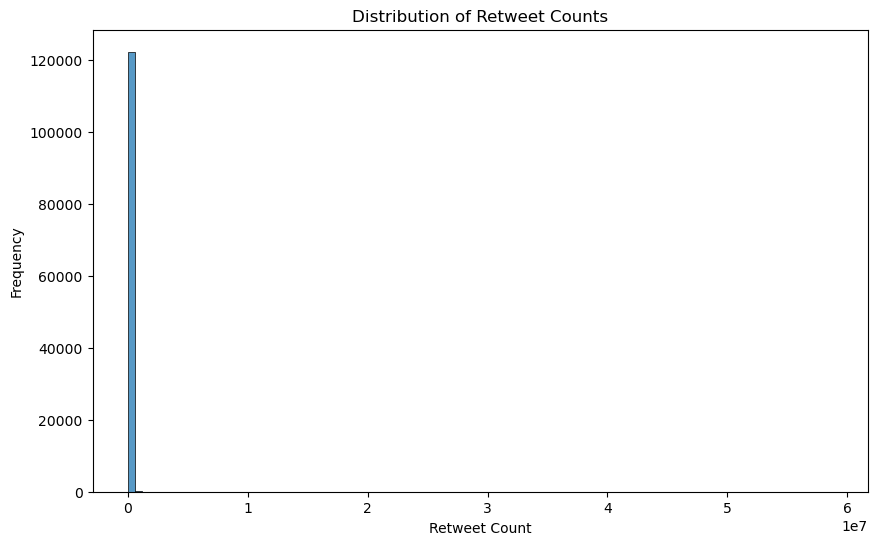

In [103]:
# Histogram of retweet counts
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], bins=100, kde=False)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()


In [104]:
column_names = df.columns.tolist()

print(column_names)

['Unnamed: 0', 'hashed_userid', 'masked_username', 'location', 'following', 'followers', 'totaltweets', 'usercreateddt', 'tweetid', 'retweetcount', 'text', 'hashtags', 'language', 'favorite_count', 'is_retweet', 'original_tweet_id', 'in_reply_to_status_id', 'is_quote_status', 'quoted_status_id', 'extractedts', 'cleaned_text', 'preprocessed_text', 'text_with_emojis', 'text_with_slang', 'text_with_negations', 'sentiment_score']


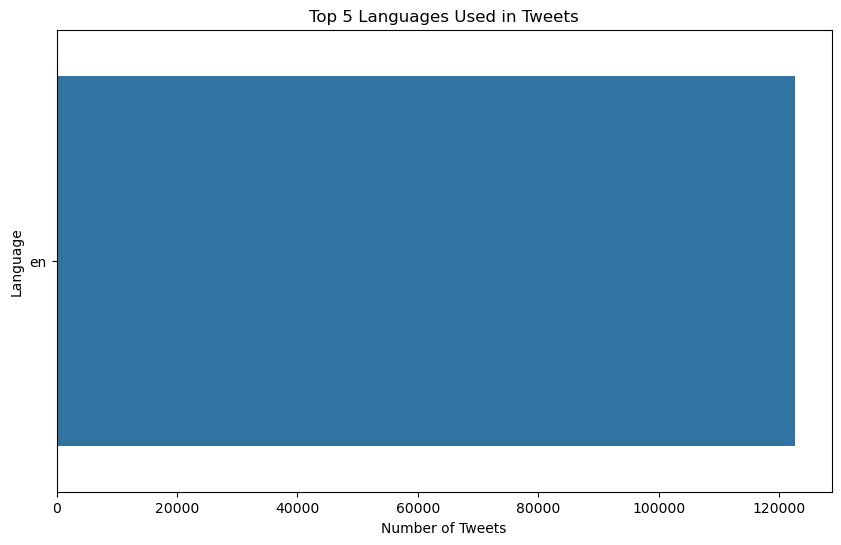

In [105]:
# Bar plot for the top 5 languages
plt.figure(figsize=(10, 6))
sns.countplot(y='language', data=df, order = df['language'].value_counts().iloc[:5].index)
plt.title('Top 5 Languages Used in Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')
plt.show()


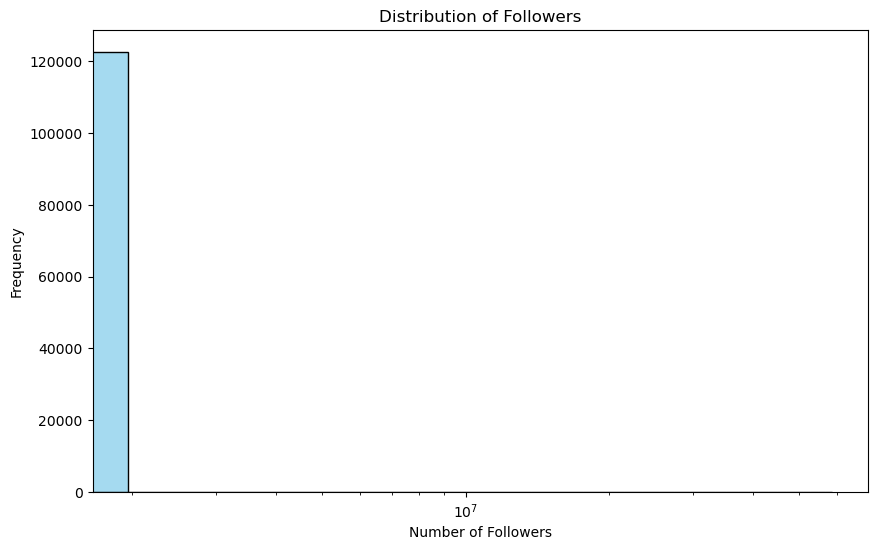

In [106]:
# Histogram of the number of followers
plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

In [107]:
# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.1f}'.format)

# Summary statistics for the number of followers
followers_summary = df['followers'].describe().round(1)
print("Summary Statistics for Followers:\n", followers_summary)

# Summary statistics for the number of retweets
retweet_summary = df['retweetcount'].describe().round(1)
print("\nSummary Statistics for Retweet Count:\n", retweet_summary)




Summary Statistics for Followers:
 count     122581.0
mean       10683.7
std       234494.2
min            0.0
25%          126.0
50%          648.0
75%         2837.0
max     58745067.0
Name: followers, dtype: float64

Summary Statistics for Retweet Count:
 count   122581.0
mean        15.8
std        531.7
min          0.0
25%          0.0
50%          0.0
75%          1.0
max     100831.0
Name: retweetcount, dtype: float64


In [108]:
# Create a new column for tweet length
df['tweet_length'] = df['text'].str.len()

# Summary statistics for tweet length
tweet_length_summary = df['tweet_length'].describe().round(1)
print("Summary Statistics for Tweet Length:\n", tweet_length_summary)


Summary Statistics for Tweet Length:
 count   122581.0
mean       207.4
std         79.9
min         20.0
25%        143.0
50%        215.0
75%        276.0
max        989.0
Name: tweet_length, dtype: float64
